### EDA (Exploratory Data Analysis)
Understand:

Churn distribution

Customer behavior

Patterns & trends

STEP 3.2.1 – LOAD DATA


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\232339\Desktop\customer_churn_Model\data\customer_churn_dataset.csv")

STEP 3.2.2 – BASIC CHECKS

In [3]:
df.shape

(440832, 12)

In [4]:
df.head()

,customer_id,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,2,30,Female,39,14,5,18,Standard,Annual,932.0,17,1
1,3,65,Female,49,1,10,8,Basic,Monthly,557.0,6,1
2,4,55,Female,14,4,6,18,Basic,Quarterly,185.0,3,1
3,5,58,Male,38,21,7,7,Standard,Monthly,396.0,29,1
4,6,23,Male,32,20,5,8,Basic,Monthly,617.0,20,1


In [5]:
df.describe()

,customer_id,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


STEP 3.2.3 – CHURN DISTRIBUTION

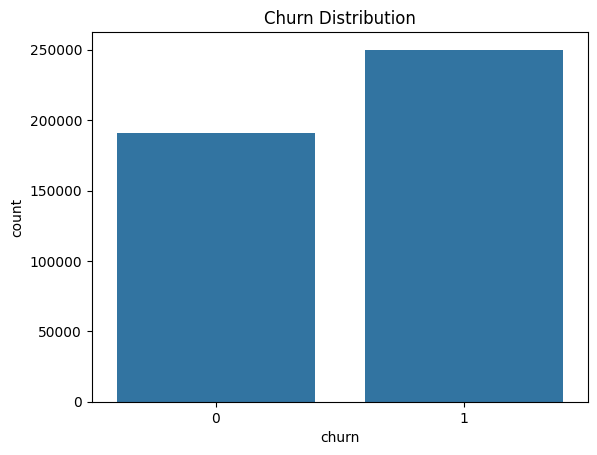

In [6]:
df['churn'].value_counts(normalize=True) * 100

sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()

STEP 3.2.4 – NUMERICAL VS CHURN

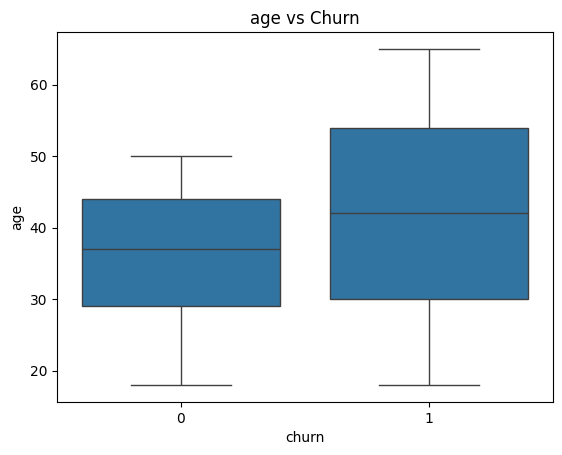

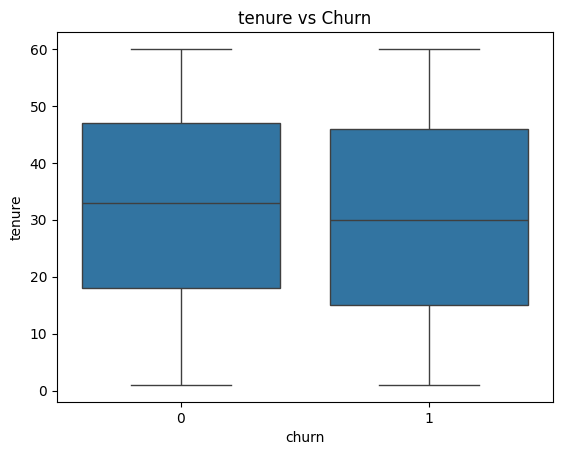

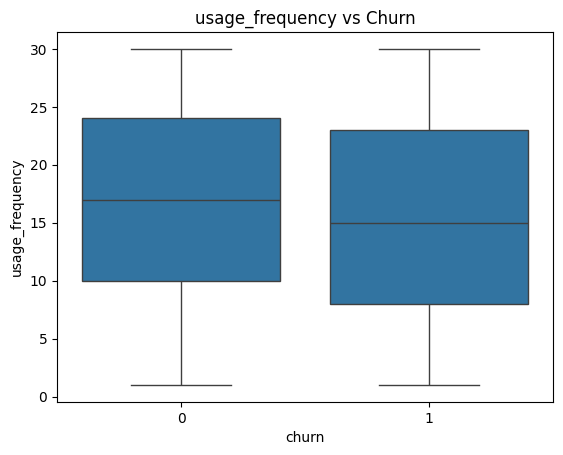

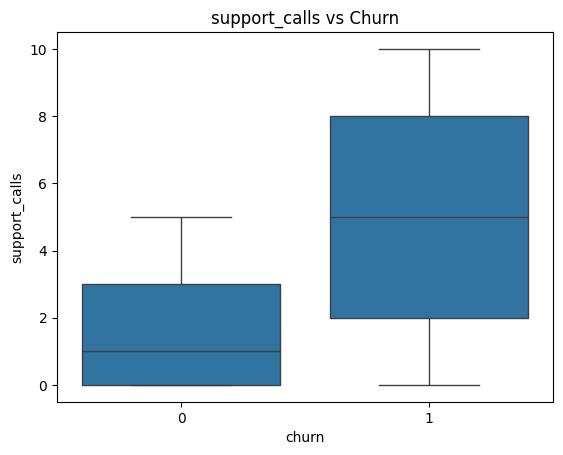

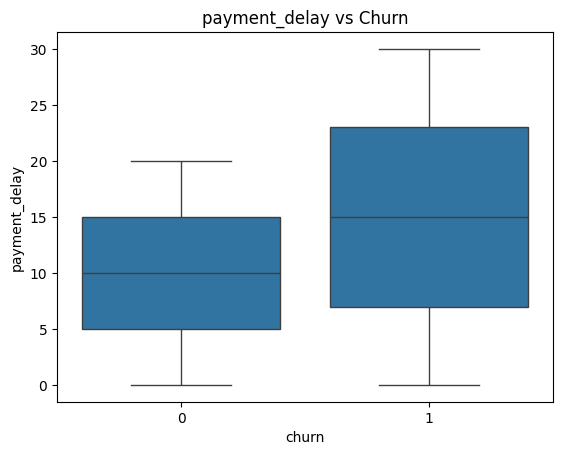

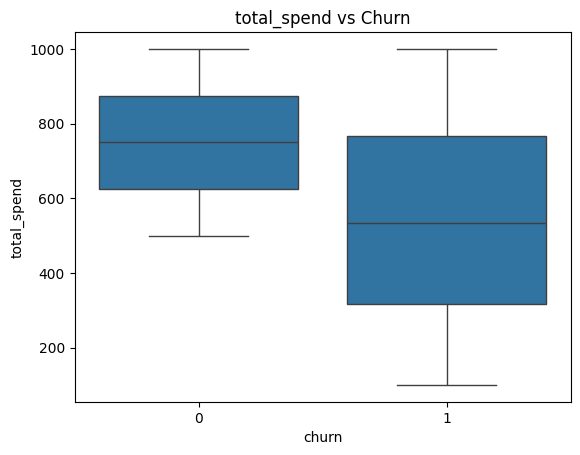

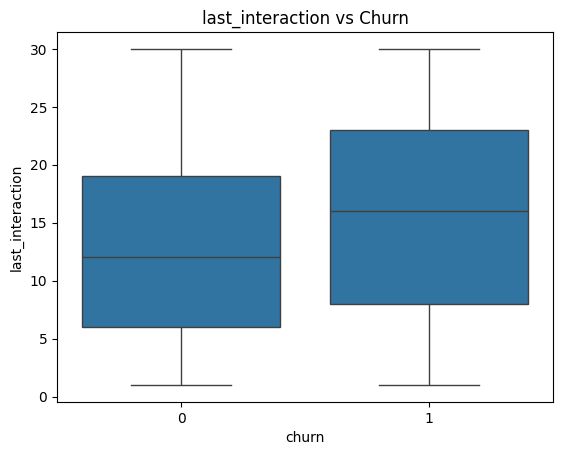

In [7]:
num_cols = [
    'age', 'tenure', 'usage_frequency',
    'support_calls', 'payment_delay',
    'total_spend', 'last_interaction'
]

for col in num_cols:
    sns.boxplot(x='churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()

STEP 3.2.5 – CATEGORICAL VS CHURN

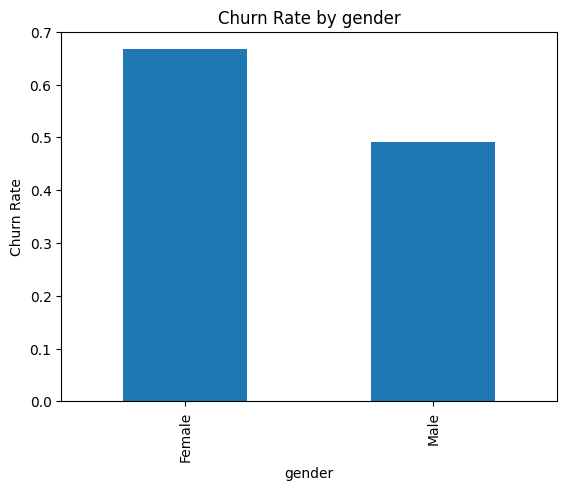

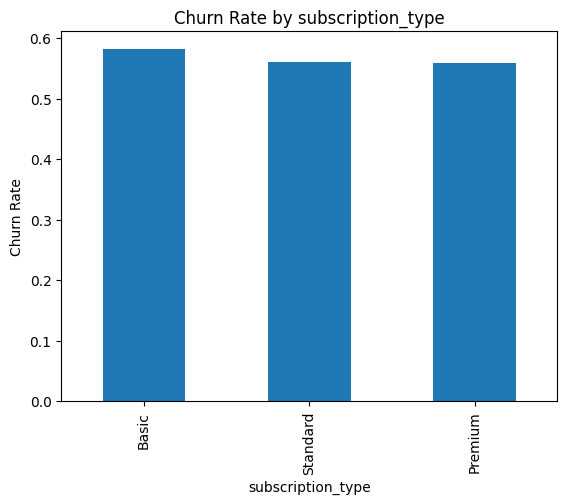

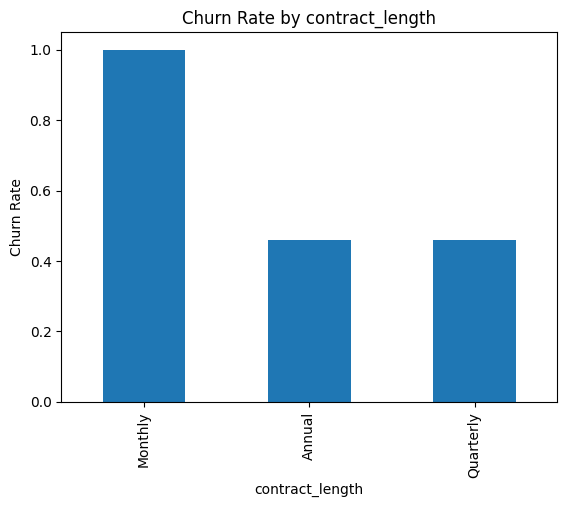

In [8]:
cat_cols = ['gender', 'subscription_type', 'contract_length']

for col in cat_cols:
    churn_rate = df.groupby(col)['churn'].mean().sort_values(ascending=False)
    churn_rate.plot(kind='bar')
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.show()